(32736, 3)


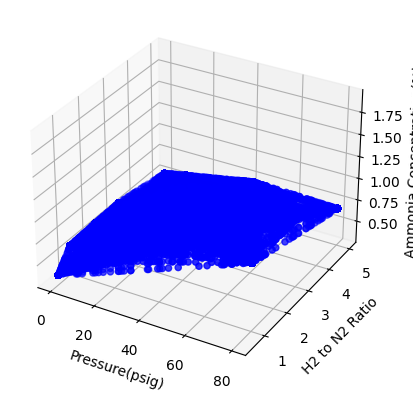

In [ ]:
## Without Duplicate Training Data
import numpy as np
import pandas as pd
import itertools
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC, RandomOverSampler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import Adam

data2 = np.array([[0, 0.5, 0.36],
[20.49, 0.5, 0.69],
[39.18, 0.5, 0.96],
[59.59, 0.5, 1.21],
[79.93, 0.5, 1.43],
[0, 1, 0.58],
[10.24, 1, 0.79],
[20.11, 1, 0.96],
[39.33, 1, 1.23],
[59.44, 1, 1.44],
[75.44, 1, 1.55],
[79.85, 1, 1.57],
[0, 2, 0.60],
[10.09, 2, 0.78],
[20.41, 2, 0.94],
[39.18, 2, 1.15],
[59.51, 2, 1.29],
[75.59, 2, 1.34],
[80, 2, 1.34],
[0, 3, 0.61],
[10.32, 3, 0.71],
[20.56, 3, 0.79],
[39.18, 3, 0.91],
[59.44, 3, 1],
[79.85, 3, 1.03],
[0, 5, 0.51],
[10.32, 5, 0.56],
[20.49, 5, 0.59],
[39.33, 5, 0.65],
[59.66, 5, 0.67],
[79.85, 5, 0.68],
[80, 1, 1.57],
[80, 1, 1.16],
[80, 1, 1.02],
[80, 1, 1.89]])

# Convert data2 into a DataFrame
my_column_names = ['Pressure(psig)','H2 to N2 ratio','Ammonia Concentration(%)']
data2 = pd.DataFrame(data=data2, columns=my_column_names)

data2VariableNames = data2.columns.tolist()
feaColums = data2VariableNames[1:3]
labels = data2VariableNames[3:]

data2Del = data2.drop_duplicates(subset=feaColums,keep='first',inplace=False)
#print(data2Del)

ind_list = [i for i in range(data2Del.shape[0])]
#print(ind_list)

ind_set = list(itertools.combinations(ind_list,2))
#print(ind_set)

model_smote = SMOTE(k_neighbors=1,random_state=0)

data_smote_all = []
ind_smote_all = []
ind_smote = np.zeros(data2Del.shape[0]-5)
#print(ind_smote)

ind_smote[:2] = 1
#print(ind_smote[:2])
smote_data = []
i = 0

for item in ind_set:
    ind_ = list(item)
    y_smote = np.zeros(data2Del.shape[0])
    y_smote[ind_] = 1
    i +=1
    data_smote_resampled, y_smote_resampled = model_smote.fit_resample(data2Del, y_smote)
    smote_data.append(data_smote_resampled)

# Convert the list to a NumPy array
smote_data = np.array(smote_data)
smote_data = smote_data.reshape(-1, 3)
print(smote_data.shape)

# Separate the input features (pressure and gas ratio) and the target output (ammonia concentration)
pressure = smote_data[:, 0]
ratio = smote_data[:, 1]
concentration = smote_data[:, 2]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with labels
ax.scatter(pressure, ratio, concentration, c='b', marker='o')
ax.set_xlabel('Pressure(psig)')
ax.set_ylabel('H2 to N2 Ratio')
ax.set_zlabel('Ammonia Concentration(%)')

# Adjust the viewing angle
# ax.view_init(elev=30, azim=120)

# Show the plot
plt.show()


In [ ]:
## Without Duplicate Training Data
import numpy as np
import pandas as pd
import plotly.graph_objects as go

import itertools
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC, RandomOverSampler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import Adam

data2 = np.array([[0, 0.5, 0.36],
[20.49, 0.5, 0.69],
[39.18, 0.5, 0.96],
[59.59, 0.5, 1.21],
[79.93, 0.5, 1.43],
[0, 1, 0.58],
[10.24, 1, 0.79],
[20.11, 1, 0.96],
[39.33, 1, 1.23],
[59.44, 1, 1.44],
[75.44, 1, 1.55],
[79.85, 1, 1.57],
[0, 2, 0.60],
[10.09, 2, 0.78],
[20.41, 2, 0.94],
[39.18, 2, 1.15],
[59.51, 2, 1.29],
[75.59, 2, 1.34],
[80, 2, 1.34],
[0, 3, 0.61],
[10.32, 3, 0.71],
[20.56, 3, 0.79],
[39.18, 3, 0.91],
[59.44, 3, 1],
[79.85, 3, 1.03],
[0, 5, 0.51],
[10.32, 5, 0.56],
[20.49, 5, 0.59],
[39.33, 5, 0.65],
[59.66, 5, 0.67],
[79.85, 5, 0.68],
[80, 1, 1.57],
[80, 1, 1.16],
[80, 1, 1.02],
[80, 1, 1.89]])

# Convert data2 into a DataFrame
my_column_names = ['Pressure(psig)','H2 to N2 ratio','Ammonia Concentration(%)']
data2 = pd.DataFrame(data=data2, columns=my_column_names)

data2VariableNames = data2.columns.tolist()
feaColums = data2VariableNames[1:3]
labels = data2VariableNames[3:]

data2Del = data2.drop_duplicates(subset=feaColums,keep='first',inplace=False)
#print(data2Del)

ind_list = [i for i in range(data2Del.shape[0])]
#print(ind_list)

ind_set = list(itertools.combinations(ind_list,2))
#print(ind_set)

model_smote = SMOTE(k_neighbors=1,random_state=0)

data_smote_all = []
ind_smote_all = []
ind_smote = np.zeros(data2Del.shape[0]-5)
#print(ind_smote)

ind_smote[:2] = 1
#print(ind_smote[:2])
smote_data = []
i = 0

for item in ind_set:
    ind_ = list(item)
    y_smote = np.zeros(data2Del.shape[0])
    y_smote[ind_] = 1
    i +=1
    data_smote_resampled, y_smote_resampled = model_smote.fit_resample(data2Del, y_smote)
    smote_data.append(data_smote_resampled)

# Convert the list to a NumPy array
smote_data = np.array(smote_data)
smote_data = smote_data.reshape(-1, 3)
print(smote_data.shape)

# Create the scatter plot
fig = go.Figure(data=go.Scatter3d(
    x=smote_data[:,0],
    y=smote_data[:,1],
    z=smote_data[:,2],
    mode='markers',
    marker=dict(
        size=8,
        color=smote_data[:,2],                # Set color scale to z-values
        colorscale='Viridis',   # Choose a colorscale
        opacity=0.8
    )
))

# Set plot title and axis labels
fig.update_layout(
    title='3D Scatter Plot',
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    )
)

# Show the plot
fig.show()


(32736, 3)


In [ ]:
# Convert data2 into a DataFrame
my_column_names = ['Pressure(psig)','H2 to N2 ratio','Ammonia Concentration(%)']
data2 = pd.DataFrame(data=data2, columns=my_column_names)

data2VariableNames = data2.columns.tolist()
feaColums = data2VariableNames[1:3]
labels = data2VariableNames[3:]

data2Del = data2.drop_duplicates(subset=feaColums,keep='first',inplace=False)
#print(data2Del)

ind_list = [i for i in range(data2Del.shape[0])]
#print(ind_list)

ind_set = list(itertools.combinations(ind_list,2))
#print(ind_set)

model_smote = SMOTE(k_neighbors=1,random_state=0)

data_smote_all = []
ind_smote_all = []
ind_smote = np.zeros(data2Del.shape[0]-5)
#print(ind_smote)

ind_smote[:2] = 1
#print(ind_smote[:2])
smote_data = []
i = 0

for item in ind_set:
    ind_ = list(item)
    y_smote = np.zeros(data2Del.shape[0])
    y_smote[ind_] = 1
    i +=1
    data_smote_resampled, y_smote_resampled = model_smote.fit_resample(data2Del, y_smote)
    smote_data.append(data_smote_resampled)

# Convert the list to a NumPy array
smote_data = np.array(smote_data)
smote_data = smote_data.reshape(-1, 3)
print(smote_data.shape)

# Convert smote_data into a DataFrame
smote_df = pd.DataFrame(data=smote_data, columns=['Pressure(psig)', 'H2 to N2 ratio', 'Ammonia Concentration(%)'])

# Create scatter plot for SMOTE data
fig = go.Figure(data=go.Scatter(
    x=smote_df['Pressure(psig)'],
    y=smote_df['H2 to N2 ratio'],
    mode='markers',
    marker=dict(
        size=8,
        color=smote_df['Ammonia Concentration(%)'],  # Set color scale to ammonia concentration
        colorscale='Viridis',  # Choose a colorscale
        opacity=0.8,
        colorbar=dict(title='Ammonia Concentration(%)')  # Add colorbar
    )
))

# Set plot title and axis labels
fig.update_layout(
    title='2D Scatter Plot of SMOTE Data with Color Gradient',
    xaxis=dict(title='Pressure(psig)'),
    yaxis=dict(title='H2 to N2 ratio')
)

# Show the plot
fig.show()


(32736, 3)
